### <p style="text-align: right;"> Nicolas Dronchi </p>

# Homework #5: Practice with Machine Learning Classification (Individual)

<img src=https://ml.berkeley.edu/blog/assets/tutorials/1/image_3.svg width=500px>

In this assignment, you'll work on finishing your perceptron binary classifier or find an example online that you can copy (with proper citation!), modify as necessary, and then run on the iris data file from class. If you already managed to get the perceptron model to work in class, you'll be asked to find a version online and compare it to your solution. The details of all of this are include in Part 1 in the text below.

After that you'll practice using scikit-learn to classify data using a classification model of your choosing. This should help you to become more comfortable with using scikit-learn, which may be helpful for you semester project, depending on what topic you chose to pursue.

**You are encouraged to read through the entire assignment before you start to make sure you understand what you're expected to do.**

### Goals for this assignment:

By the end of this assignment, you should be able to:

* Use the perceptron model to classify linearly separable data.
* Use one of the built-in classification models in scikit-learn to classify new data.

### Assignment instructions

**This assignment is due at 11:59pm on Sunday, April 1st.** This is an individual assignment, but you should feel free to discuss issues you run into in the CMSE 202 "help" channel on Slack. When you're done, it should be uploaded into the "Homework Assignments" dropbox folder for Homework #5. Further submission instructions can be found at the end of the notebook.

### Grading

* Part 1: Completing and testing the perceptron model (10 points)
* Part 2: Using scikit-learn to classify data (20 points + 2 possible bonus points)

Total points: **30** (+2 possible bonus points)

---
## Part 1: Using the perceptron model to classify data



In your Day 16 in-class assignment you worked toward building the perceptron classifier from scratch. For this part of the homework assignment **you need to accomplish one of the following options**:

1. If you did not finish writing and testing your perceptron class and would like to do so, you should do that here. The details of the perceptron model from the in-class assignment are reproduced below. You should make sure that your classifier works with the `iris.csv` file from class (which is also included in the homework directory of the assignments repository). You should also make the plot that was displayed at the end of the in-class assignment that shows the decision boundary along with the data.

2. If you did not finish writing and testing your perceptron class, but are not confident that you were headed down the path with designing your method, you are encourage to find an example on the internet, reproduce it here, cite your source, and run the classifier on the `iris.csv` file from class. Once you get the code working, you should make sure you produce a plot that displays the data and a line for the decision boundary (as described in the in-class assignment).

3. If you *did* get your perceptron model working, reproduce it here and confirm that it produces the expected decision boundary by producing a plot. In addition to this, find some example Python code for the perceptron model online, provide a link to the example, review the approach used in the example, and highlight how the approach differed from your approach. Is there anything from the example that you think is better than your solution? Anything that you think is worse? Include this discussion in your assignment.

**Which of the above three options are you completing for this assignment?**

*Put your chosen option here*

### Details for building and training the model

Remember, when you train the model, you should only use ~75% of the available data as training data and reserve the remaining 25% to performing testing. Once you have a working model, you should **include a test to ensure that the model produces the right classifications on some for you testing data**.

You should use the `iris.csv` file contained within the homework directory as your training and testing data.

Once everything is working, make sure you plot the data and the decision boundary for your model. 

**The details for the perceptron model, the suggestions for how to build a class from scratch, and the details for plotting the decision boundary are all reproduced from the in-class at the end of this notebook. Use these as a reference when creating your final solution**.

If you decide to use an example from the internet, **make sure to include a proper citation or link to the source!** If you do not, you will not receive full points.

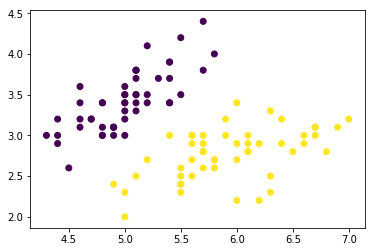

100


In [22]:
# Do This: Load in the iris.csv file and plot the data based on the iris classifications
import csv
import matplotlib.pyplot as plt
import numpy as np

sepal_length = []
sepal_width = []
label = []
with open('iris.csv', 'r') as data:
    datareader = csv.reader(data, delimiter=',', quotechar='|')
    for i,row in enumerate(datareader):
        if i == 0:
            continue
        sepal_length.append(float(row[0]))
        sepal_width.append(float(row[1]))
        label.append(row[2])

colors = []
for i in label:
    if i == 'Iris-setosa':
        colors.append(-1)
    elif i == 'Iris-versicolor':
        colors.append(1)
    else:
        colors.append(2)

dataset = np.vstack((np.asarray(sepal_length), np.asarray(sepal_width)))
dataset = dataset.T

plt.scatter(sepal_length, sepal_width, c=colors)
plt.show()
print(len(colors))

In [23]:
import numpy as np

class perceptron():
    def __init__(self, eta, n_iter, bias=0):
        self.eta = eta
        self.n_iter = n_iter
        self.bias = bias
    
    def fit(self, data, labels):
        '''does the learning'''
        self.weights = np.zeros(data.shape[1])
        
        for i in range(self.n_iter):
            for j in range(len(self.weights)):
                change = 0
                for k in range(len(data)):
                    target = float(labels[k])
                    predicted = self.predict(data[k])
                    ss = self.eta * (target - predicted)
                    change += ss*data[k][j]
                    self.bias += ss
                self.weights[j] += change
       
    
    def predict(self, values):
        '''outputs the predicted class'''
        prediction = np.dot(self.weights, values) + self.bias
        if prediction >= 0:
            return 1.0
        else:
            return -1.0


In [24]:
from sklearn.model_selection import train_test_split

A = perceptron(0.1,100)
train_vectors, test_vectors, train_labels, test_labels = train_test_split(dataset, colors, 
                                                                          random_state=1,test_size=0.25)
A.fit(train_vectors, train_labels)
print(A.weights)

[ 45.5  -73.38]


In [29]:
print("Predicting people's names on the test set")
pred_labels = []
for i in test_vectors:
    pred_labels.append(A.predict(i))
# print(pred_labels)

correct = 0
for i in range(len(test_labels)):
    if test_labels == pred_labels:
        correct += 1
print("percent correct: ", 100*correct/len(test_labels))
        

Predicting people's names on the test set
percent correct:  100.0


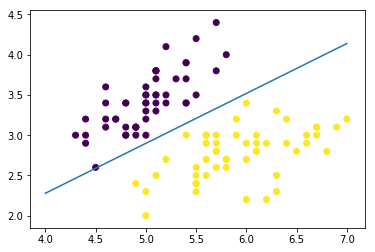

In [30]:
# Compute the decision boundary and make a plot of it, along with the data
m = -A.weights[0]/A.weights[1]
b = -A.bias/A.weights[1]

def line(x,m,b):
    return m*x + b
x = np.linspace(4,7,num=50)
plt.plot(x,line(x,m,b))
plt.scatter(sepal_length, sepal_width, c=colors)

plt.show()

---
## Part 2: Classifying data using scikit-learn

This part of the assignment is intentionally a bit open-ended to give you the opportunity to chose a dataset that you find interesting and practice using a classification method from [scikit-learn](http://scikit-learn.org/stable/), one of the most commonly used packages for doing machine learning in Python.

For this part of the assignment, you are tasked with choosing an available dataset from the [University of California Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) and performing a classification on it using scikit-learn. Not only are you allowed to choose the dataset you want to use, but you can also choose which machine learning classification scheme you want to use. scikit-learn offers [many classification options](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) and you can see that they generate [many different types of decision boundaries](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html).

When choosing a dataset, you should make sure to choose a dataset that is well-suited for performing classification. Luckily, the UCI repository [makes this easy](https://archive.ics.uci.edu/ml/datasets.html?format=&task=cla&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table).

For this part of the assignment, **you need to**:

* Choose and link to a dataset from the UCI machine learning repository
* Choose a classification method from the availables options in scikit-learn
* Build your classifier by training the model
* Test you classifier to determine its accuracy
* Bonus points: visualize the decision boundaries of your classifier. (this part can be tricky, so it is not required that you get it working, but you will receive 2 extra points if you do)

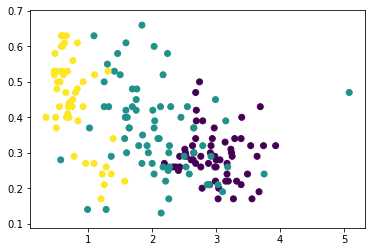

In [60]:
#Wine classifier through feature selection and nearest neighbors
feature_vectors = []
class_labels = []

with open("winedata.csv", "r") as data:
    for line in data:
        #unpacks the data and stores them in a list
        numbers_float = map(float, line.split(","))
        initial_points_data = list(numbers_float)
        sample_feature_vectors = initial_points_data[1:]
        sample_class_label = initial_points_data[0]
        feature_vectors.append(sample_feature_vectors)
        class_labels.append(sample_class_label)
      
feature_vectors = np.asarray(feature_vectors)
class_labels = np.asarray(class_labels)
plt.scatter(feature_vectors[:,6],feature_vectors[:,7], c=class_labels)
plt.show()

C:\Users\Maxwell\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


(178, 2)


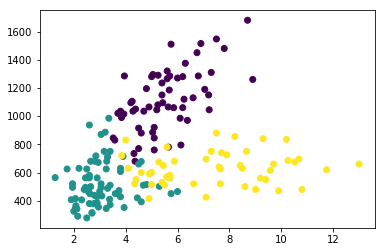

In [61]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
FV_new = SelectKBest(chi2, k=2).fit_transform(feature_vectors, class_labels)
print(FV_new.shape)
plt.scatter(FV_new[:,0], FV_new[:,1], c=class_labels)
plt.show()

In [62]:
train_vectors, test_vectors, train_labels, test_labels = train_test_split(FV_new, class_labels, 
                                                                          random_state=1, test_size=0.25)

In [69]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(2)
clf.fit(train_vectors, train_labels)
score = clf.score(test_vectors, test_labels)
print("The nearest neighbor model had an accuracy of :", score)

The nearest neighbor model had an accuracy of : 0.7777777777777778


In [71]:
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier
clf = GaussianProcessClassifier(1.0 * RBF(1.0))
clf.fit(train_vectors, train_labels)
score = clf.score(test_vectors, test_labels)
print("The gaussian process gives a score of ", score)

The gaussian process gives a score of  0.8888888888888888


---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [72]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://goo.gl/forms/ehyvkPQPtWkurmav1" 
	width="80%" 
	height="800px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

___
# Congrats, you're done!

Upload a copy of this notebook to the "Homework #5" dropbox on D2L.

---

---
## The details of the perceptron model (reproduced from the in-class assignment)

The perceptron is a what is known as a basic binary classifier. It takes in a set of training data that is linerally separable and then computes a *set of weights* and a *bias term* to apply to input data as to properly classify it. Perceptrons only works for data that contains two classes and is linearly separable. For data that does not have these properties, the classifier cannot properly learn the weights and bias term.

Since the perceptron is based on linearly separable data, we can think of the model as trying to learn the slope of a line, $y = m~x + b$. However in machine learning, we usually define $X$ to be an input *vector*, which is a $1$ by $N$ matrix, where $N$ is the number of measurements or "features" for a given sample. Then, we can create a similar matrix of weights, $W$, also of length N, and re-write our equation to be:

$$ Y = W \cdot X + B$$

where $Y$ represents the resulting classification, consisting of either -1 or 1, depending on the output of $W \cdot X$, the dot product of $W$ and $X$, and $B$ represents the bias term.  More explicitly, we can look at this in a matrix format:

$$ Y = \begin{bmatrix} w_1 & w_2 & \dots & w_n \end{bmatrix} \cdot \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix} + B $$

But, **how do we go about learning the weights of the model?**

We learn the model weights by attempting to predict the class of our input data using an initial guess for the weights, and then update our weight values based on our prediction. We can define a "step size" for how much we change our weight between subsequent guess in the following way:

`step_size = eta * (target class - predicted class)` 

Then, using our "step size", we then update all of our weights by multiplying our *step size times the corresponding feature values*:

$$w_{1,new} = w_{1,old} + (\mathrm{step~size} \times x_{1})$$
$$w_{2,new} = w_{2,old} + (\mathrm{step~size} \times x_{2})$$
$$ \vdots $$
$$w_{N,new} = w_{N,old} + (\mathrm{step~size} \times x_{N})$$

We also have to update our bias term, but just use the step size for this update: $B_{new} = B_{old} + \mathrm{step~size}$.

In this model, we use `eta` to represent our "learning_rate", which takes on a value between 0 and 1.

The step size should always be a positive or negative decimal value depending on `eta`. For example, if we set the learning rate, `eta`, to be .1 and our target is -1 and we predict 1 then the we get the following equation.

`step_size = .1 * (-1-1) = -.2`
   
Alternativey, if our target is 1 and we predict it as -1 then we will get the following.

`step_size = .1 * (1 - -1) = .2`

This process occurs iteratively. So, for a set number of iterations we calculate a step size and adjust the weights accordingly.

**But, how do we handle the "learning" process when we have multiple samples?**

In this case, we need to update the weights based on _all_ of the sample features. So our original equation above becomes:

$$w_{1,new} = w_{1,old} + \sum_{i=0}^{M} (\mathrm{step~size} \times x_{1,i})$$
$$w_{2,new} = w_{2,old} + \sum_{i=0}^{M} (\mathrm{step~size} \times x_{2,i})$$
$$ \vdots $$
$$w_{N,new} = w_{N,old} + \sum_{i=0}^{M} (\mathrm{step~size} \times x_{N,i})$$

where $M$ is our total number of samples and we compute new weights for every features value.

We also need to make sure we update the bias value in a similar way:

$$B_{new} = B_{old} + \sum_{i=0}^{M} (\mathrm{step~size})$$

## Suggestions for how to set up the class from scratch (reproduced from the in-class assignment)

> 
* Define the perceptron class with an `__init__` method
    - The class should be initialized with the following attributes:
        - user defined input value for `eta`, the learning rate for the perceptron.
        - a number of interations to be used by the model, `n_iter`. This should also be an input parameter.
        - an initial values for the bias (you can choose whether or not the user can set this values or if you want a standard default).
* Create two methods for the perceptron clas, a `fit` method that does the learning and a `predict` method that outputs the predicted class
    - The `fit` method should:
        - define an array of weights the same length as the input vector. You can choose how to initialize the weight values.
        - go through a set number of iterations (based on `n_iter`) where it makes predictions and updates the weights vector accordingly for each subsequent round of predictions.
    - The `predict` method should:
        - take in a feature vector and return the predicted class based on the current weights
        - *hint*: The prediction is just a dot product of the weights and the features plus the bias term. The resulting ouput should be in the range (-1,1), depending on the value of the dot product. If the prediction is less than 0 it should return -1, otherwise it should return 1.

## Plotting the decision boundary (reproduced from the in-class assignment)

Finally, to better understand our classifier, it might help to plot what is known as the "decision boundary". The decision boundary is the line that seperates the classes in the classifier. The line is defined by the weights and the bias term that we calculated for our model.

The slope of the decision boundary is defined as:

$$ m = -\frac{w_1}{w_2} $$

And the $y$-intercept, $b$, is defined as:

$$ b = -\frac{B}{w_2} $$

You should be able to generate a set of evenly spaced $x$-axis values and then used the equation for a line ($y = mx + b$) to compute the decision boundary for making a plot of the line. You should get something that looks like this:

<img src=https://i.imgur.com/UPX8XDy.png>

---

---